In [1]:
#  import libraries
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import random

### Defining the Datasets:

##### (Preparing Data for In-Topic Setup)

#### Gretz dataset:

In [59]:
# gretz Dataset

gretz = pd.read_csv("gretz/arg_quality_rank_30k.csv", usecols=["argument", "topic", "set", "WA"])
gretz.rename(columns={"WA": "label"}, inplace=True)

# split into the train-dev-test sets
gretz_train = gretz[gretz["set"] == "train"]
gretz_dev = gretz[gretz["set"] == "dev"]
test_gretz = gretz[gretz["set"] == "test"]

# print(len(gretz_train))
# print(len(gretz_dev))
# print(len(test_gretz))

gretz = pd.concat([gretz_train, gretz_dev, test_gretz])
gretz.reset_index(inplace=True, drop=True)
gretz.to_csv("gretz/gretz.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")
# # prepare gretz test set for toledo model but remove common topics

#### Toledo Dataset

In [60]:
# toledo Dataset

filenames = glob.glob("toledo/IBM-ArgQ-5.3kArgs/*.tsv")

complete_toledo = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename, sep="\t", engine='python')
    data["topic"] = filename[25:-4]
    data["topic"] = data["topic"].apply(lambda x: x.replace("-"," "))
    complete_toledo.append(data)

comp_toledo = pd.concat(complete_toledo)
comp_toledo.reset_index(inplace=True, drop=True)

# prepare train, dev and test sets.

# toledo_test_extra = comp_toledo.loc[comp_toledo["topic"].isin(["Flu-vaccination-should-be-mandatory-(PRO)", "Flu-vaccination-should-not-be-mandatory-(CON)"])].reset_index(drop=True)
# toledo_training = comp_toledo.loc[~comp_toledo["topic"].isin(["Flu-vaccination-should-be-mandatory-(PRO)", "Flu-vaccination-should-not-be-mandatory-(CON)"])].reset_index(drop=True)

toledo_train, toledo_test = train_test_split(comp_toledo, test_size= 0.05, random_state = 42, shuffle=True)
toledo_train, toledo_dev = train_test_split(toledo_train, test_size= 0.05, random_state = 42, shuffle=True)

# print(len(toledo_train))
# print(len(toledo_dev))
# print(len(toledo_test))

toledo_train["set"] = "train"
toledo_dev["set"] = "dev"
toledo_test["set"] = "test"
toledo = pd.concat([toledo_train, toledo_dev, toledo_test])
toledo.rename(columns={"rank": "label"}, inplace=True)
toledo["topic"] = toledo["topic"].str[:-6]
toledo.reset_index(inplace=True, drop=True)

toledo.to_csv("toledo/toledo.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Swanson Dataset

In [61]:
# swanson 

filenames = glob.glob("swanson/*means.csv")

complete_swanson = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filenames[i], usecols=['GoodSliderMean', 'Phrase.x'], engine='python')
    data["topic"] = filename[8:-17]
    complete_swanson.append(data)

comp_swanson = pd.concat(complete_swanson)
comp_swanson.reset_index(inplace=True, drop=True)
comp_swanson.rename(columns={"GoodSliderMean": "label", "Phrase.x": "argument"}, inplace=True)

for key, topic in {"dp": "death penalty", "evo": "evolution", "gm": "gay marriage" , "gc": "gun control"}.items():
    comp_swanson["topic"] = comp_swanson["topic"].replace(key, topic)

swanson_train, swanson_test = train_test_split(comp_swanson, test_size= 0.05, random_state = 42, shuffle=True)
swanson_train, swanson_dev = train_test_split(swanson_train, test_size= 0.05, random_state = 42, shuffle=True)

# print(len(swanson_train))
# print(len(swanson_dev))
# print(len(swanson_test))

swanson_train["set"] = "train"
swanson_dev["set"] = "dev"
swanson_test["set"] = "test"
swanson = pd.concat([swanson_train, swanson_dev, swanson_test])
swanson.reset_index(inplace=True, drop=True)

swanson.to_csv("swanson/swanson.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### UKP Dataset

In [62]:
# ukprank

filenames = glob.glob("habb/data/UKPConvArg1-Ranking-CSV/*.csv")
complete_ukprank = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename, sep="\t")
    data["topic"] = filename[34:-4]
    data["topic"] = data["topic"].apply(lambda x: x.replace("-", " "))
    complete_ukprank.append(data)
    
comp_ukprank = pd.concat(complete_ukprank)
comp_ukprank.reset_index(inplace=True, drop=True)
comp_ukprank["rank_rev"] = 1 - comp_ukprank["rank"] 
comp_ukprank["rank_norm"] = (comp_ukprank["rank_rev"] - comp_ukprank["rank_rev"].min())/(comp_ukprank["rank_rev"].max() - comp_ukprank["rank_rev"].min())
comp_ukprank.rename(columns={"#id": "id", "rank": "old_rank", "rank_norm": "label"}, inplace=True)

ukprank_training, ukprank_test = train_test_split(comp_ukprank, test_size= 0.15, random_state = 42, shuffle=True)
ukprank_train, ukprank_dev = train_test_split(ukprank_training, test_size= 0.10, random_state = 42, shuffle=True)

# print(len(ukprank_train))
# print(len(ukprank_dev))
# print(len(ukprank_test))

ukprank_train["set"] = "train"
ukprank_dev["set"] = "dev"
ukprank_test["set"] = "test"
ukp = pd.concat([ukprank_train, ukprank_dev, ukprank_test])
ukp.reset_index(inplace=True, drop=True)
ukp["topic"] = ukp["topic"].str.split("_", n=1, expand=True)[0]

ukp.to_csv("habb/ukp.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

#### Webis Corpus

In [72]:
web = pd.read_csv("Webis/webis-argquality20-full.csv")

Text(0.5, 1.0, 'Relevance')

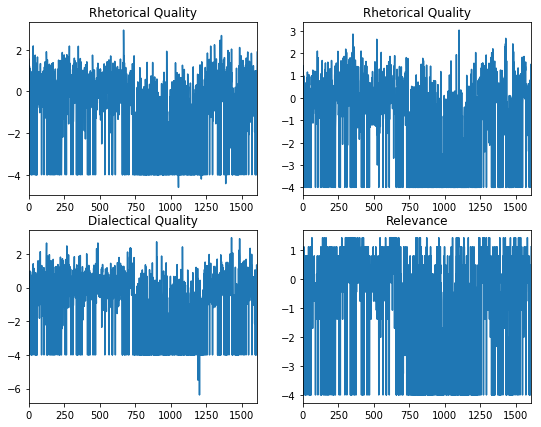

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
web['Rhetorical Quality'].plot(ax=axes[0, 0]); axes[0, 0].set_title('Rhetorical Quality')
web['Logical Quality'].plot(ax=axes[0, 1]); axes[0, 1].set_title('Rhetorical Quality')
web['Dialectical Quality'].plot(ax=axes[1, 0]); axes[1, 0].set_title('Dialectical Quality')
web['Relevance'].plot(ax=axes[1, 1]); axes[1, 1].set_title('Relevance')

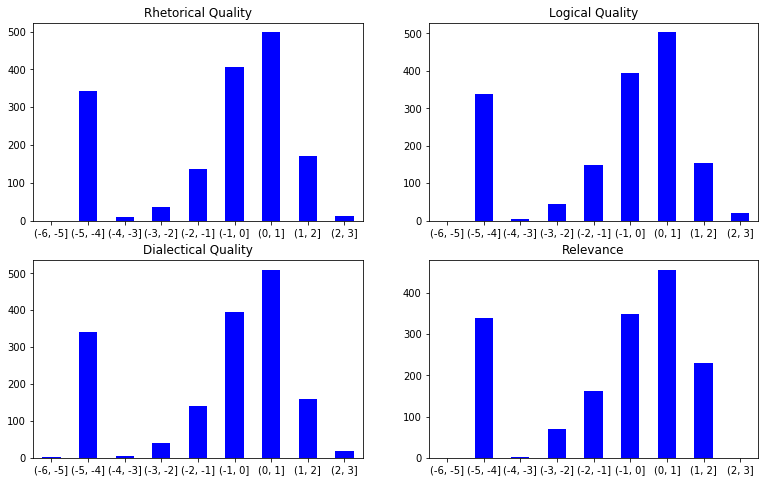

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
out = pd.cut(web['Rhetorical Quality'], bins=[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3], include_lowest=False)
out.value_counts(sort=False).plot.bar(rot=0, color="b", ax=axes[0, 0])
axes[0, 0].set_title('Rhetorical Quality')

out = pd.cut(web['Logical Quality'], bins=[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3], include_lowest=False)
out.value_counts(sort=False).plot.bar(rot=0, color="b", ax = axes[0, 1])
axes[0, 1].set_title('Logical Quality')

out = pd.cut(web['Dialectical Quality'], bins=[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3], include_lowest=False)
out.value_counts(sort=False).plot.bar(rot=0, color="b", ax = axes[1, 0])
axes[1, 0].set_title('Dialectical Quality')

out = pd.cut(web['Relevance'], bins=[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3], include_lowest=False)
out.value_counts(sort=False).plot.bar(rot=0, color="b", ax = axes[1, 1])
axes[1, 1].set_title('Relevance')
plt.show()

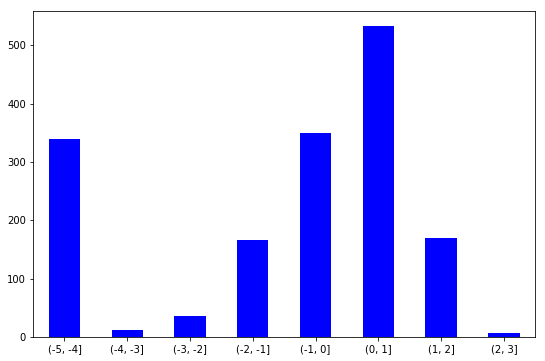

In [23]:
# Combined Quality
out = pd.cut(web['Combined Quality'], bins=[-5, -4, -3, -2, -1, 0, 1, 2, 3], include_lowest=False)
out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize= (9, 6))
plt.show()

In [24]:
web.rename(columns={"Rhetorical Quality": "rhet_qual", "Dialectical Quality": "dial_qual", "Logical Quality": "log_qual"}, inplace=True)
web_fil = web[(web.dial_qual < -4) | (web.rhet_qual < -4)]
web_fil

,Topic ID,Argument ID,Discussion ID,Premise,Relevance,Is Argument?,rhet_qual,log_qual,dial_qual,Text Length,Stance,Combined Quality
945,16,8,42602,HA ARE YOU KIDDING ME? OF COURCE TAP WATER IS ...,-0.446654,True,-4.028049,-2.776898,-1.817925,21,False,-3.274828
1054,8,9,39623,thevanthi.t forfeited this round. Pro Vote for...,-1.697778,True,-4.608127,-1.581327,-1.823784,8,False,-2.957823
1191,3,6,27623,what are you talking about soccer? can u leave...,-2.948902,True,-2.284825,-1.879279,-5.496521,21,False,-3.521367
1193,3,4,19459,When we eat fast food is saves the time,-1.697778,True,-1.681884,0.185990,-4.145024,9,False,-1.967299
1202,3,3,12726,If they are having car crashes maybe they shou...,-1.384997,True,-1.286850,-1.365045,-6.378822,15,True,-3.041184
1215,2,2,1151,Disincentives to spend spell economic disaster,-1.697778,True,-4.207761,-1.720259,-2.797543,6,False,-3.296483
1387,8,10,35914,Electronic voting can make the franchise more ...,-0.133873,True,-4.426448,-1.910552,-2.044203,8,True,-3.141057


In [73]:
# Min-Max Normalization
web["label"] = (web["Combined Quality"] - web["Combined Quality"].min())/(web["Combined Quality"].max() - web["Combined Quality"].min())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212BE2E7390>,
      dtype=object)

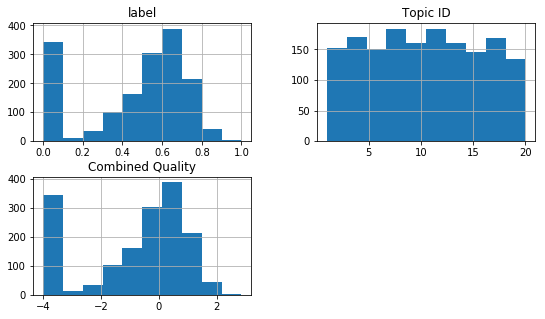

In [74]:
web_cleaned = web.loc[:, ["Premise", "label", "Topic ID", "Combined Quality"]]
web_cleaned.hist(figsize=(9,5))

In [75]:
web_topic_file = pd.read_csv("Webis/webis-argquality20-topics.csv")
web_with_topics = pd.merge(web_cleaned, web_topic_file, on=['Topic ID'], how='inner')

In [76]:
web_with_topics.drop(["Combined Quality", "Topic ID", "Short Query", "Category"], axis=1, inplace=True)
web_with_topics.rename(columns={"Premise": "argument", "Long Query": "topic"}, inplace=True)

In [79]:
web_training, web_test = train_test_split(web_with_topics, test_size= 0.15, random_state = 42, shuffle=True)
web_train, web_dev = train_test_split(web_training, test_size= 0.10, random_state = 42, shuffle=True)

# print(len(web_train))
# print(len(web_dev))
# print(len(web_test))

web_train["set"] = "train"
web_dev["set"] = "dev"
web_test["set"] = "test"
web = pd.concat([web_train, web_dev, web_test])
web.reset_index(inplace=True, drop=True)

web.to_csv("Webis/webis.csv", columns=["argument", "label", "set", "topic"], header=True, index=True, index_label="id")

C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

### EDA:

In [2]:
#  read the data files if not already done.
gretz = pd.read_csv("gretz/gretz.csv")
ukp = pd.read_csv("habb/ukp.csv")
swanson = pd.read_csv("swanson/swanson.csv")
toledo = pd.read_csv("toledo/toledo.csv")
webis = pd.read_csv("webis/webis.csv")
complete_set = pd.concat([gretz, toledo, swanson, ukp, webis], ignore_index=True, sort=True)


datasets = [toledo, swanson, ukp, gretz, webis, complete_set]
toledo.name = "Toledo"
swanson.name = "Swanson"
ukp.name = "UKP"
gretz.name = "Gretz"
webis.name = "Webis"
complete_set.name = "Merged"

# split into the train-dev-test sets
gretz_train = gretz[gretz["set"] == "train"]
gretz_dev = gretz[gretz["set"] == "dev"]
gretz_test = gretz[gretz["set"] == "test"]
# split into the train-dev-test sets
toledo_train = toledo[toledo["set"] == "train"]
toledo_dev = toledo[toledo["set"] == "dev"]
toledo_test = toledo[toledo["set"] == "test"]
# split into the train-dev-test sets
swanson_train = swanson[swanson["set"] == "train"]
swanson_dev = swanson[swanson["set"] == "dev"]
swanson_test = swanson[swanson["set"] == "test"]
# split into the train-dev-test sets
ukp_train = ukp[ukp["set"] == "train"]
ukp_dev = ukp[ukp["set"] == "dev"]
ukp_test = ukp[ukp["set"] == "test"]
# split into the train-dev-test sets
webis_train = webis[webis["set"] == "train"]
webis_dev = webis[webis["set"] == "dev"]
webis_test = webis[webis["set"] == "test"]
# split into the train-dev-test sets
complete_train = complete_set[complete_set["set"] == "train"]
complete_dev = complete_set[complete_set["set"] == "dev"]
complete_test = complete_set[complete_set["set"] == "test"]

In [81]:
for dataset in datasets:
    print("Length of {} dataset: {}".format(dataset.name, len(dataset)))

Length of Toledo dataset: 5298
Length of Swanson dataset: 5375
Length of UKP dataset: 1052
Length of Gretz dataset: 30497
Length of Webis dataset: 1610
Length of Merged dataset: 43832


#### Label Distribution Analysis (Topic-independent):

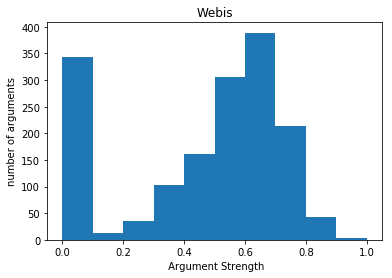

In [12]:
#  Label Distribution across the respective complete datasets
# fig, axes = plt.subplots(1,6, figsize=(16, 5))

# axes[0].hist(gretz["label"])
# axes[0].set_title("IBM-ArgQ")
# axes[0].set_xlabel("rank")
# axes[1].hist(toledo["label"])
# axes[1].set_title("IBM-Rank")
# axes[1].set_xlabel("rank")
# axes[2].hist(swanson["label"])
# axes[2].set_title("SwanRank")
# axes[2].set_xlabel("rank")
# axes[3].hist(ukp["label"])
# axes[3].set_title("UKPConvArgRank")
# axes[3].set_xlabel("rank")
# axes[4].hist(webis["label"])
# axes[4].set_title("Webis")
# axes[4].set_xlabel("rank")
# axes[5].hist(complete_set["label"])
# axes[5].set_title("Merged")
# axes[5].set_xlabel("rank")
# plt.savefig('ArgQ_data_histograms.png')

plt.hist(webis["label"])
plt.title("Webis")
plt.xlabel(" Argument Strength")
plt.ylabel("number of arguments")
plt.show()

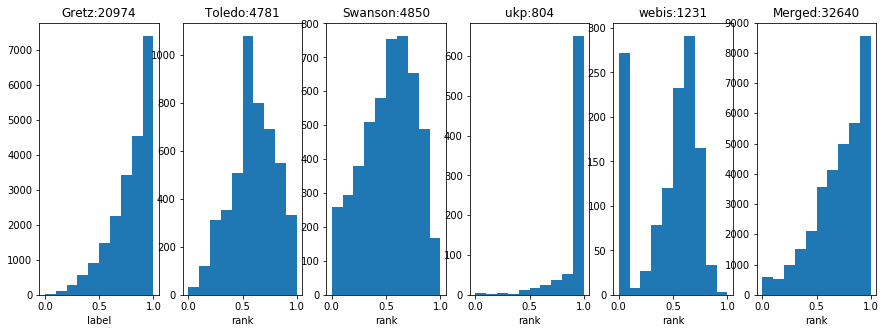

In [83]:
#  Label Distribution across the respective train datasets

fig, axes = plt.subplots(1,6, figsize=(15, 5))
axes[0].hist(gretz_train["label"])
axes[0].set_title("Gretz:" + str(len(gretz_train)))
axes[0].set_xlabel("label")
axes[1].hist(toledo_train["label"])
axes[1].set_title("Toledo:" + str(len(toledo_train)))
axes[1].set_xlabel("rank")
axes[2].hist(swanson_train["label"])
axes[2].set_title("Swanson:" + str(len(swanson_train)))
axes[2].set_xlabel("rank")
axes[3].hist(ukp_train["label"])
axes[3].set_title("ukp:" + str(len(ukp_train)))
axes[3].set_xlabel("rank")
axes[4].hist(webis_train["label"])
axes[4].set_title("webis:" + str(len(webis_train)))
axes[4].set_xlabel("rank")
axes[5].hist(complete_train["label"])
axes[5].set_title("Merged:" + str(len(complete_train)))
axes[5].set_xlabel("rank")
plt.show()

In [42]:
# fig, axes = plt.subplots(1,4, figsize=(15, 5))

# axes[0].hist(gretz_dev["label"])
# axes[0].set_title("Gretz")
# axes[0].set_xlabel("label")
# axes[1].hist(toledo_dev["label"])
# axes[1].set_title("Toledo")
# axes[1].set_xlabel("rank")
# axes[2].hist(swanson_dev["label"])
# axes[2].set_title("Swanson")
# axes[2].set_xlabel("rank")
# axes[3].hist(ukp_dev["label"])
# axes[3].set_title("ukp")
# axes[3].set_xlabel("rank")
# plt.show()

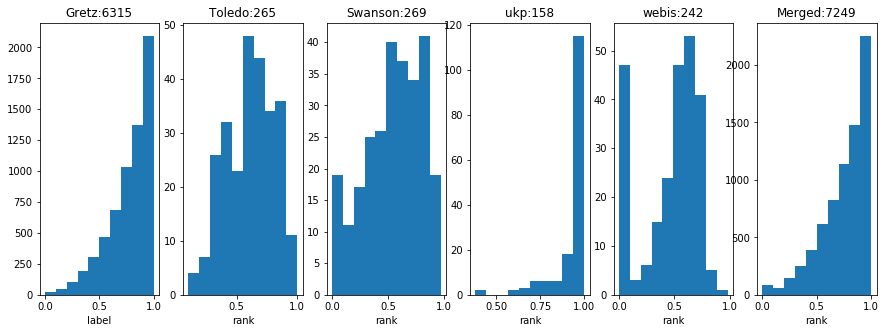

In [84]:
# Label Distribution across the respective test datasets

fig, axes = plt.subplots(1,6, figsize=(15, 5))
axes[0].hist(gretz_test["label"])
axes[0].set_title("Gretz:" + str(len(gretz_test)))
axes[0].set_xlabel("label")
axes[1].hist(toledo_test["label"])
axes[1].set_title("Toledo:" + str(len(toledo_test)))
axes[1].set_xlabel("rank")
axes[2].hist(swanson_test["label"])
axes[2].set_title("Swanson:" + str(len(swanson_test)))
axes[2].set_xlabel("rank")
axes[3].hist(ukp_test["label"])
axes[3].set_title("ukp:" + str(len(ukp_test)))
axes[3].set_xlabel("rank")
axes[4].hist(webis_test["label"])
axes[4].set_title("webis:" + str(len(webis_test)))
axes[4].set_xlabel("rank")
axes[5].hist(complete_test["label"])
axes[5].set_title("Merged:" + str(len(complete_test)))
axes[5].set_xlabel("rank")
plt.show()

#### Argument Length Analysis (Topic-independent):

In [91]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [103]:
for dataset in datasets:
    sens = list(dataset["argument"])
    topics = list(dataset["topic"])
    
    batch_encoding = tokenizer.batch_encode_plus(
        [(sen, topic) for (sen, topic) in zip(sens, topics)], pad_to_max_length=False,
        )
    # Collect all lengths
    dataset["arg_length"] = [len(x) for x in batch_encoding['input_ids']] 

In [106]:
dict_99_perc = {}
dict_995_perc = {}
for dataset in datasets:
    # Get the p percentile of lengths.
    res = int(np.percentile(dataset["arg_length"], 99))
    dict_99_perc[dataset.name] = res
    # Get the p percentile of lengths.
    res = int(np.percentile(dataset["arg_length"], 99.5))
    dict_995_perc[dataset.name] = res

In [105]:
for dataset in datasets:
    print("{} dataset:".format(dataset.name))
    print("{} \n".format(dataset[["arg_length"]].describe()))
    print("99.5th Percentile: {}\n".format(dict_995_perc[dataset.name]))

Toledo dataset:
        arg_length
count  5298.000000
mean     36.170442
std      10.073499
min      15.000000
25%      28.000000
50%      36.000000
75%      44.000000
max      82.000000 

99.5th Percentile: 59

Swanson dataset:
        arg_length
count  5375.000000
mean     28.593674
std      15.099672
min       8.000000
25%      19.000000
50%      25.000000
75%      34.000000
max     212.000000 

99.5th Percentile: 104

UKP dataset:
        arg_length
count  1052.000000
mean     72.189163
std      36.224999
min      17.000000
25%      42.000000
50%      66.000000
75%      97.000000
max     200.000000 

99.5th Percentile: 178

Gretz dataset:
         arg_length
count  30497.000000
mean      30.713578
std        9.021128
min       12.000000
25%       24.000000
50%       29.000000
75%       37.000000
max       70.000000 

99.5th Percentile: 56

Webis dataset:
        arg_length
count  1610.000000
mean    163.621118
std     116.447725
min      13.000000
25%      48.000000
50%     150.000

#### Topic Distribution Analysis:

In [13]:
for dataset in datasets:
    print("Number of Unique Topics in {}: {}".format(dataset.name, len(dataset["topic"].unique())))

Number of Unique Topics in Toledo: 22
Number of Unique Topics in Swanson: 4
Number of Unique Topics in UKP: 16
Number of Unique Topics in Gretz: 71
Number of Unique Topics in Webis: 20
Number of Unique Topics in Merged: 132


In [14]:
#  find out the number of arguments per topic of each dataset

args_per_topic = {}

for dataset in datasets:
    args_per_topic_dataset = {}
    dataset_group = dataset.groupby(["topic"])
    
    for i, group in dataset_group:
        args_per_topic_dataset[i] = len(group)
    
    args_per_topic[dataset.name] = args_per_topic_dataset

In [88]:
len(args_per_topic["Gretz"])

71

Dataset: Toledo


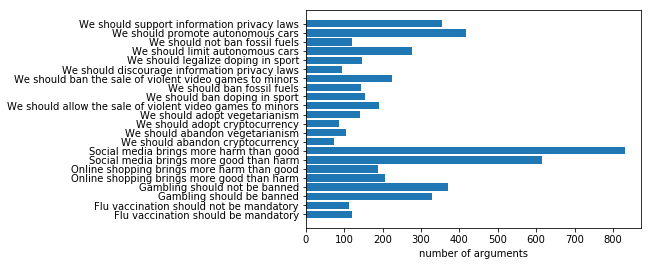

Dataset: Swanson


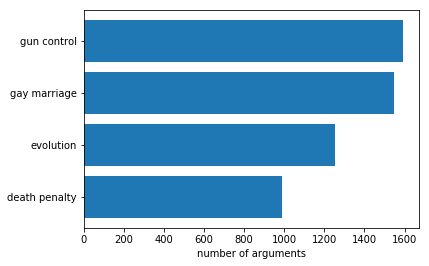

Dataset: UKP


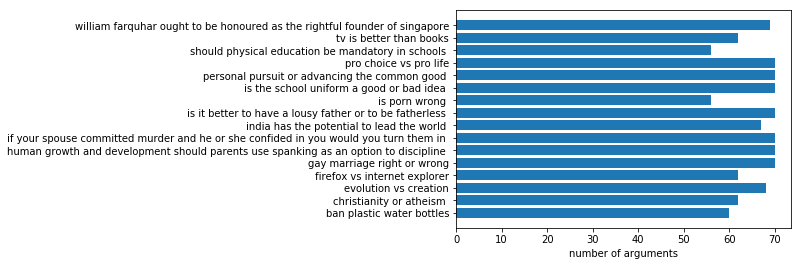

Dataset: Gretz


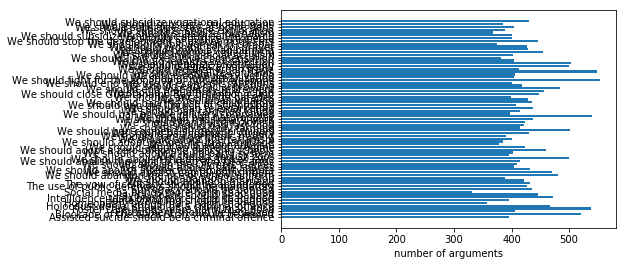

Dataset: Webis


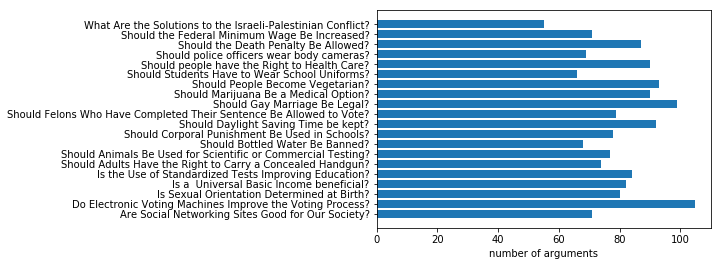

Dataset: Merged


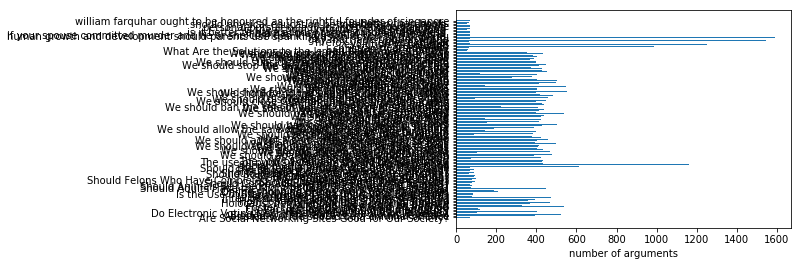

In [15]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    topics = list(args_per_topic[dataset.name].keys())
    size = list(args_per_topic[dataset.name].values())
    plt.barh(range(len(args_per_topic[dataset.name])), size, tick_label=topics)
    plt.xlabel("number of arguments")
    plt.show()

### Preparing Datasets for Equal Representation:

In [ ]:
#  select the smallest set, i.e. UKP. ~ 1052 args.
#  From all other datasets, calculate the number of args per topic to be sampled from each dataset. samples = [UKP length//(topic diversity)]
#  Draw random samples from each topic from each dataset.

# A separate function has been defined for this in the datasets script. 

In [148]:
for dataset in datasets:
    
    if dataset.name == "UKP":
         continue
    
    samples_to_be_drawn = int(np.ceil(len(ukp) / len(dataset["topic"].unique())))
    print("Sample drawn from {}: {}".format(dataset.name, samples_to_be_drawn))
    
    dataset_topic_grouped = dataset.groupby("topic")
    sample_df = pd.DataFrame()
    for topic, topic_grp in dataset_topic_grouped:
        samples = topic_grp.sample(n=samples_to_be_drawn, replace=False, random_state=42)
        sample_df = pd.concat([sample_df, samples])
    
    dataset["balanced"] = dataset.argument.isin(sample_df.argument).astype(int)

Sample drawn from Toledo: 48
Sample drawn from Swanson: 263
Sample drawn from Gretz: 15
Sample drawn from Webis: 53
Sample drawn from Merged: 8


In [147]:
gretz[gretz["balanced"]==1]

,id,argument,label,set,topic,balanced
63,63,a judges opinion should not be relevant in a d...,0.896426,train,We should limit judicial activism,1
102,102,a minor should be allowed to under go cosmetic...,0.946942,train,We should ban cosmetic surgery for minors,1
112,112,a multi party system helps ensure all people a...,1.000000,train,We should adopt a multi-party system,1
136,136,a multi-party system allows for greater freedo...,1.000000,train,We should adopt a multi-party system,1
159,159,a multi-party system enables the people to hav...,0.875782,train,We should adopt a multi-party system,1
...,...,...,...,...,...,...
30377,30377,women have shown to be equal to men in many ar...,1.000000,test,We should prohibit women in combat,1
30379,30379,Women have the exact same capabilities as men ...,0.549337,test,We should prohibit women in combat,1
30404,30404,women in the military should be created equall...,0.624434,test,We should prohibit women in combat,1
30482,30482,You cannot ban missionary work in any country ...,0.918282,test,We should ban missionary work,1
